[*********************100%***********************]  1 of 1 completed
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 10837 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10838 non-null  datetime64[ns]
 1   Open       10838 non-null  float64       
 2   High       10838 non-null  float64       
 3   Low        10838 non-null  float64       
 4   Close      10838 non-null  float64       
 5   Adj Close  10838 non-null  float64       
 6   Volume     10838 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 677.4 KB
10838 0.46807529064403025


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


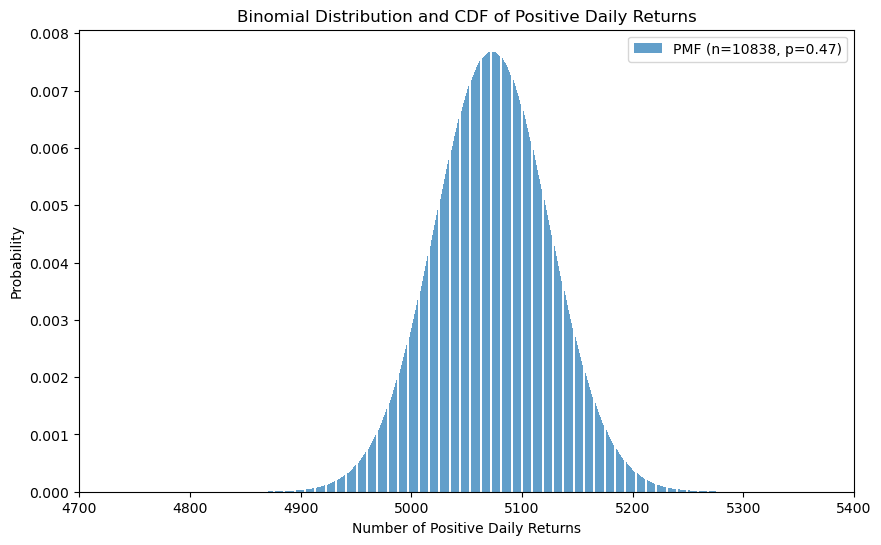

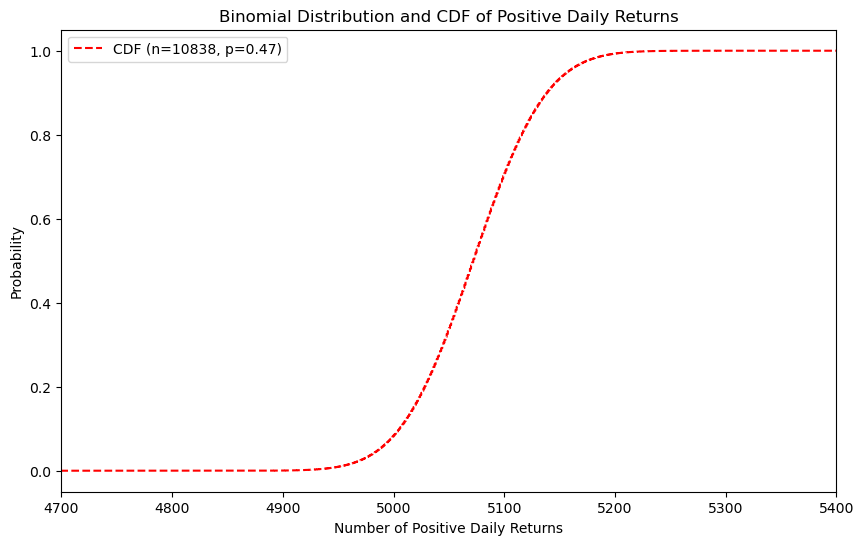

In [51]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

# Downloading the historical data
aapl_data = yf.download("AAPL", period="max")

# Resetting index for easier manipulation
aapl_data.reset_index(inplace=True)

# Sorting data by date in descending order
aapl_data.sort_values(by="Date", ascending=False, inplace=True)

# Checking for null values
print(aapl_data.isnull().sum())

# Checking data types consistency
aapl_data.info()

# Calculating daily returns
aapl_data['Daily Return'] = aapl_data['Adj Close'].pct_change() * 100

# Number of days and success probability
trials = len(aapl_data)
success_prob = aapl_data['Daily Return'].gt(0).sum() / len(aapl_data)
print(trials, success_prob)

# Modeling the data using binomial distribution
n = trials  # number of trials
p = success_prob  # probability of success (positive daily return)
x = range(1, n + 1)  # possible number of successes

# Create a binomial distribution
binomial_dist = binom.pmf(x, n, p)

# Create the Cumulative Distribution Function (CDF)
binomial_cdf = binom.cdf(x, n, p)

# Plotting the binomial distribution and CDF
plt.figure(figsize=(10, 6))
plt.xlim(4700, 5400)
plt.bar(x, binomial_dist, label=f'PMF (n={n}, p={p:.2f})', alpha=0.7)
plt.title('Binomial Distribution and CDF of Positive Daily Returns')
plt.xlabel('Number of Positive Daily Returns')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(4700, 5400)
plt.step(x, binomial_cdf, label=f'CDF (n={n}, p={p:.2f})', color='red', linestyle='--')
plt.title('Binomial Distribution and CDF of Positive Daily Returns')
plt.xlabel('Number of Positive Daily Returns')
plt.ylabel('Probability')
plt.legend()
plt.show()
